In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import os
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:

metadata=pd.read_csv('gdrive/My Drive/features_30_sec.csv')
metadata.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,0.083045,0.000767,-4.529724e-05,0.008172,0.000008,0.005698,123.046875,-113.570648,2564.207520,121.571793,295.913818,-19.168142,235.574432,42.366421,151.106873,-6.364664,167.934799,18.623499,89.180840,-13.704891,67.660492,15.343150,68.932579,-12.274110,82.204201,10.976572,63.386311,-8.326573,61.773094,8.803792,51.244125,-3.672300,41.217415,5.747995,40.554478,-5.162882,49.775421,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,0.056040,0.001448,1.395807e-04,0.005099,-0.000178,0.003063,67.999589,-207.501694,7764.555176,123.991264,560.259949,8.955127,572.810913,35.877647,264.506104,2.907320,279.932922,21.510466,156.477097,-8.560436,200.849182,23.370686,142.555954,-10.099661,166.108521,11.900497,104.358612,-5.555639,105.173630,5.376327,96.197212,-2.231760,64.914291,4.220140,73.152534,-6.012148,52.422142,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,0.076291,0.001007,2.105576e-06,0.016342,-0.000019,0.007458,161.499023,-90.722595,3319.044922,140.446304,508.765045,-29.093889,411.781219,31.684334,144.090317,-13.984504,155.493759,25.764742,74.548401,-13.664875,106.981827,11.639934,106.574875,-11.783643,65.447945,9.718760,67.908859,-13.133803,57.781425,5.791199,64.480209,-8.907628,60.385151,-1.077000,57.711136,-9.229274,36.580986,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,0.033309,0.000423,4.583644e-07,0.019054,-0.000014,0.002712,63.024009,-199.544205,5507.517090,150.090897,456.505402,5.662678,257.161163,26.859079,158.267303,1.771399,268.034393,14.234031,126.794128,-4.832006,155.912079,9.286494,81.273743,-0.759186,92.114090,8.137607,71.314079,-3.200653,110.236687,6.079319,48.251999,-2.480174,56.799400,-1.079305,62.289902,-2.870789,51.651592,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,0.101461,0.001954,-1.756129e-05,0.004814,-0.000010,0.003094,135.999178,-160.337708,5195.291992,126.219635,853.784729,-35.587811,333.792938,22.148071,193.456100,-32.478600,336.276825,10.852294,134.831573,-23.352329,93.257095,0.498434,124.672127,-11.793437,130.073349,1.207256,99.675575,-13.088418,80.254066,-2.813867,86.430626,-6.933385,89.555443,-7.552725,70.943336,-9.164666,75.793404,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [ ]:
"""Feature Extraction"""

'Feature Extraction'

In [ ]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [ ]:
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients

extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    try:
        final_class_labels=row["label"]
        file_name = os.path.join(os.path.abspath(audio_dataset_path), final_class_labels+'/',str(row["filename"]))    
        data=features_extractor(file_name)
        extracted_features.append([data,final_class_labels])
    except Exception as e:
        print(f"Error: {e}")
        continue

787it [00:00, 3879.93it/s]

Error: name 'audio_dataset_path' is not defined
Error: name 'audio_dataset_path' is not defined
Error: name 'audio_dataset_path' is not defined
Error: name 'audio_dataset_path' is not defined
Error: name 'audio_dataset_path' is not defined
Error: name 'audio_dataset_path' is not defined
Error: name 'audio_dataset_path' is not defined
Error: name 'audio_dataset_path' is not defined
Error: name 'audio_dataset_path' is not defined
Error: name 'audio_dataset_path' is not defined
Error: name 'audio_dataset_path' is not defined
Error: name 'audio_dataset_path' is not defined
Error: name 'audio_dataset_path' is not defined
Error: name 'audio_dataset_path' is not defined
Error: name 'audio_dataset_path' is not defined
Error: name 'audio_dataset_path' is not defined
Error: name 'audio_dataset_path' is not defined
Error: name 'audio_dataset_path' is not defined
Error: name 'audio_dataset_path' is not defined
Error: name 'audio_dataset_path' is not defined
Error: name 'audio_dataset_path' is not 

1000it [00:00, 3448.02it/s]

Error: name 'audio_dataset_path' is not defined
Error: name 'audio_dataset_path' is not defined
Error: name 'audio_dataset_path' is not defined
Error: name 'audio_dataset_path' is not defined
Error: name 'audio_dataset_path' is not defined
Error: name 'audio_dataset_path' is not defined
Error: name 'audio_dataset_path' is not defined
Error: name 'audio_dataset_path' is not defined
Error: name 'audio_dataset_path' is not defined
Error: name 'audio_dataset_path' is not defined
Error: name 'audio_dataset_path' is not defined
Error: name 'audio_dataset_path' is not defined
Error: name 'audio_dataset_path' is not defined
Error: name 'audio_dataset_path' is not defined
Error: name 'audio_dataset_path' is not defined
Error: name 'audio_dataset_path' is not defined
Error: name 'audio_dataset_path' is not defined
Error: name 'audio_dataset_path' is not defined
Error: name 'audio_dataset_path' is not defined
Error: name 'audio_dataset_path' is not defined
Error: name 'audio_dataset_path' is not 

In [ ]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class


In [ ]:
extracted_features_df['class'].value_counts()

Series([], Name: class, dtype: int64)

In [ ]:
"""Split the dataset"""

'Split the dataset'

In [ ]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())
X.shape

(0,)

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))
y.shape

ValueError: ignored

In [ ]:
"""train test split"""

'train test split'

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(799, 40)
(200, 40)
(799, 10)
(200, 10)


In [ ]:
"""Model Architecture"""

'Model Architecture'

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
### No of classes
num_labels=y.shape[1]

In [ ]:
model=Sequential()
model.add(Dense(1024,input_shape=(40,), activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.3))

###final layer
model.add(Dense(num_labels, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1024)              41984     
                                                                 
 dropout_6 (Dropout)         (None, 1024)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               524800    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 128)              

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
import time
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)

In [ ]:
from matplotlib import pyplot as plt

def plot_history(history, ylim=None):
    fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, dpi=150)
    ax1.plot(np.array(history.epoch)+1, history.history['loss'])
    ax1.set_ylabel('Cross-Entropy Loss')
    ax1.set_yscale('log')
    ax1.grid(alpha=.5)
    if history.history.__contains__('lr'):
        ax1b = ax1.twinx()
        ax1b.plot(history.history['lr'], 'g-', linewidth=1)
        ax1b.set_yscale('log')
        ax1b.set_ylabel('Learning Rate', color='g')

    ax2.plot(np.array(history.epoch)+1, history.history['accuracy'])
    ax2.set_ylabel('Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.grid(alpha=.5)
    if ylim:
        ax2.set_ylim(ylim)
  #ax2.legend()
    plt.show() 

Epoch 1/100
25/25 [==============================] - 1s 14ms/step - loss: 4.5615 - accuracy: 0.0976 - val_loss: 2.3145 - val_accuracy: 0.1100
Epoch 2/100
25/25 [==============================] - 0s 10ms/step - loss: 2.6817 - accuracy: 0.0864 - val_loss: 2.2994 - val_accuracy: 0.1100
Epoch 3/100
25/25 [==============================] - 0s 9ms/step - loss: 2.4451 - accuracy: 0.1239 - val_loss: 2.2883 - val_accuracy: 0.1400
Epoch 4/100
25/25 [==============================] - 0s 9ms/step - loss: 2.3254 - accuracy: 0.1377 - val_loss: 2.2364 - val_accuracy: 0.1750
Epoch 5/100
25/25 [==============================] - 0s 10ms/step - loss: 2.3335 - accuracy: 0.1464 - val_loss: 2.2752 - val_accuracy: 0.2350
Epoch 6/100
25/25 [==============================] - 0s 11ms/step - loss: 2.2997 - accuracy: 0.1314 - val_loss: 2.2649 - val_accuracy: 0.1500
Epoch 7/100
25/25 [==============================] - 0s 10ms/step - loss: 2.2864 - accuracy: 0.1514 - val_loss: 2.1959 - val_accuracy: 0.2200
Epoch 8/

25/25 [==============================] - 0s 9ms/step - loss: 1.2207 - accuracy: 0.5419 - val_loss: 1.4444 - val_accuracy: 0.4900
Epoch 59/100
25/25 [==============================] - 0s 9ms/step - loss: 1.2672 - accuracy: 0.5369 - val_loss: 1.4039 - val_accuracy: 0.4950
Epoch 60/100
25/25 [==============================] - 0s 9ms/step - loss: 1.1684 - accuracy: 0.5807 - val_loss: 1.5069 - val_accuracy: 0.4600
Epoch 61/100
25/25 [==============================] - 0s 9ms/step - loss: 1.1871 - accuracy: 0.5620 - val_loss: 1.3724 - val_accuracy: 0.4950
Epoch 62/100
25/25 [==============================] - 0s 9ms/step - loss: 1.2114 - accuracy: 0.5444 - val_loss: 1.3487 - val_accuracy: 0.5000
Epoch 63/100
25/25 [==============================] - 0s 9ms/step - loss: 1.1696 - accuracy: 0.5832 - val_loss: 1.4892 - val_accuracy: 0.5100
Epoch 64/100
25/25 [==============================] - 0s 9ms/step - loss: 1.1595 - accuracy: 0.5682 - val_loss: 1.3116 - val_accuracy: 0.5250
Epoch 65/100
25/25 

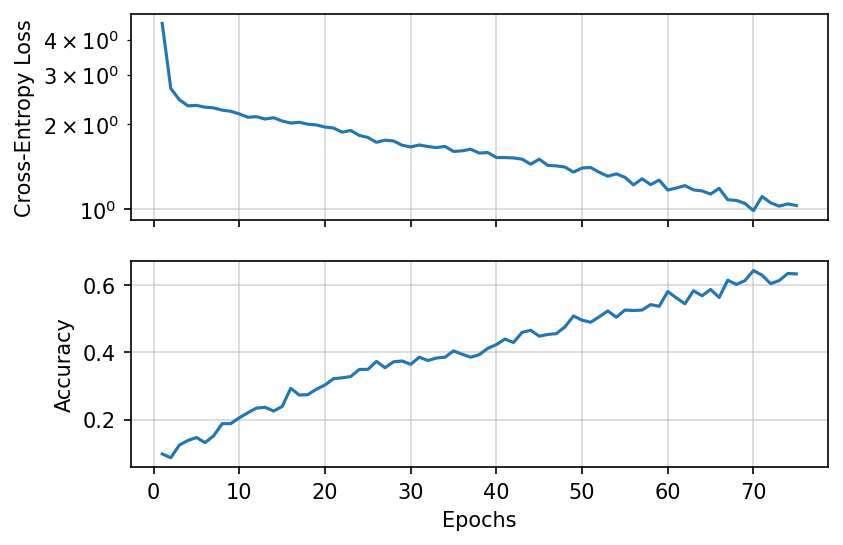

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import EarlyStopping
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
start = datetime.now()

history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)
plot_history(history)

In [ ]:
model.evaluate(X_test,y_test,verbose=0)

[1.4135866165161133, 0.5649999976158142]

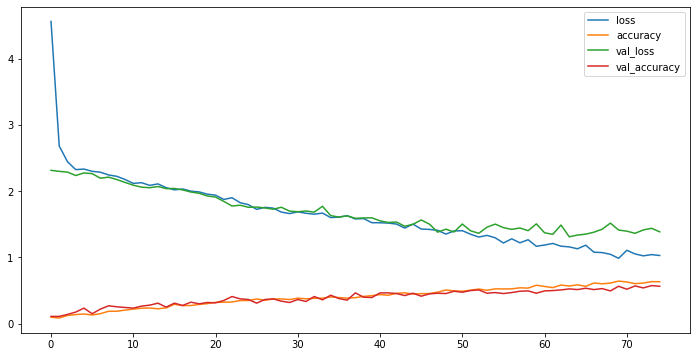

In [ ]:
pd.DataFrame(history.history).plot(figsize=(12,6))
plt.show()

In [ ]:
model.predict(X_test)

array([[4.23936058e-37, 4.88168073e-33, 3.46558688e-37, ...,
        1.00000000e+00, 1.95389532e-33, 1.13969155e-20],
       [6.87254608e-01, 7.02404520e-07, 2.11820990e-01, ...,
        1.91323124e-07, 6.14868896e-03, 8.95133168e-02],
       [3.61387096e-02, 8.22798902e-05, 2.02901736e-02, ...,
        3.78575751e-05, 8.59038055e-01, 1.88845955e-02],
       ...,
       [2.35668749e-01, 5.75462449e-03, 2.49283224e-01, ...,
        2.80353101e-03, 2.06181601e-01, 9.93484482e-02],
       [4.53209206e-02, 5.42697962e-03, 3.73330265e-02, ...,
        4.30760011e-02, 2.59453170e-02, 2.31262073e-01],
       [1.53362099e-03, 6.78517681e-04, 6.79822464e-04, ...,
        7.29503343e-04, 2.98899680e-01, 1.67569891e-02]], dtype=float32)

In [ ]:
filename="C://Users/HP/Desktop/Tu Ilmenau notes/DL/DL project/Data/genres_original/blues/blues.00000.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-1.1357065e+02  1.2157179e+02 -1.9168142e+01  4.2366421e+01
 -6.3646641e+00  1.8623499e+01 -1.3704889e+01  1.5343150e+01
 -1.2274110e+01  1.0976572e+01 -8.3265734e+00  8.8037920e+00
 -3.6723001e+00  5.7479949e+00 -5.1628819e+00  7.5273985e-01
 -1.6902146e+00 -4.0897897e-01 -2.3035226e+00  1.2212901e+00
 -3.5343499e+00 -1.1414334e+00 -4.2830324e+00 -4.2261953e+00
  9.1561663e-01  9.1268724e-01 -5.7613473e+00 -3.9327433e+00
  1.5108240e+00  2.6988823e+00  5.6574712e+00 -3.2662375e+00
 -2.0303418e-01 -3.0002940e+00  4.4772329e+00 -4.7590590e-01
  6.0092382e+00 -5.8892500e-02 -3.4585075e+00 -1.8423905e+00]
[[-1.1357065e+02  1.2157179e+02 -1.9168142e+01  4.2366421e+01
  -6.3646641e+00  1.8623499e+01 -1.3704889e+01  1.5343150e+01
  -1.2274110e+01  1.0976572e+01 -8.3265734e+00  8.8037920e+00
  -3.6723001e+00  5.7479949e+00 -5.1628819e+00  7.5273985e-01
  -1.6902146e+00 -4.0897897e-01 -2.3035226e+00  1.2212901e+00
  -3.5343499e+00 -1.1414334e+00 -4.2830324e+00 -4.2261953e+00
   9.1561663e-01 

ValueError: y should be a 1d array, got an array of shape (1, 10) instead.